In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# initial parameters
a0, a1 = 0.301444, 0.201954
b0, b1 = -0.0844103, 0.409993

In [23]:
# leaning rate
beta = 0.1

In [6]:
# inputs values
inputs = np.array([0.7853, 1.57])
# target values
targets = np.array([0.707, 1.0])

In [7]:
targets

array([0.707, 1.   ])

In [8]:
inputs

array([0.7853, 1.57  ])

In [21]:
# ReLU
def activation_fn(x):
    return np.maximum(0, x)
# derivative of ReLu activation function
def activation_deriv(x):
    return np.where(x>0, 1, 0)

In [16]:
# forward pass
def forward(x, a0, a1, b0, b1):
    u = a0 + a1 * x
    y = activation_fn(u)
    v = b0 + b1 * y
    z = activation_fn(v)
    return u, y, v, z

Loss function (mean squared error: MSE) = (z-t)^2

Derivative's chain rule is applied to simplify calculations:

dL/db0 = (dL/dz) * (dz/dv) * (dv/b0)

dL/dz = d((z-t)^2) / dz = z-t

dz/dv = d(activation_fn(v)) / dv = activation_deriv

dv/b0 = d(b0 + b1 * y) / db0 = 1

In [31]:
# compute gradiants
def compute_gradients(x, t, u, y, v, z, b1):
    dz = (z - t) * activation_deriv(v)       # ∂L/∂v
    db0 = dz
    db1 = dz * y
    dy = dz * b1 * activation_deriv(u)       # ∂L/∂u
    da0 = dy
    da1 = dy * x
    return db0, db1, da0, da1

In [25]:
# batch train
epochs = 50
mse_history = []

for epoch in range(epochs):
    sum_db0 = sum_db1 = sum_da0 = sum_da1 = 0.0

    # sum gradiants
    for x, t in zip(inputs, targets):
        u, y, v, z = forward(x, a0, a1, b0, b1)
        db0, db1, da0, da1 = compute_gradients(x, t, u, y, v, z, b1)
        sum_db0 += db0
        sum_db1 += db1
        sum_da0 += da0
        sum_da1 += da1

    # average gradiants and calculate new parameters
    N = len(inputs)
    a0 -= beta * sum_da0 / N
    a1 -= beta * sum_da1 / N
    b0 -= beta * sum_db0 / N
    b1 -= beta * sum_db1 / N

    # record loss
    outputs = np.array([forward(x, a0, a1, b0, b1)[-1] for x in inputs])
    mse = np.mean((outputs - targets) ** 2)
    mse_history.append(mse)

    # print every 10 epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d}: MSE = {mse:.6f}")

Epoch   1: MSE = 0.002921
Epoch  10: MSE = 0.001614
Epoch  20: MSE = 0.001461
Epoch  30: MSE = 0.001323
Epoch  40: MSE = 0.001197
Epoch  50: MSE = 0.001083



✅ Training complete.
Final weights: a0=0.4505, a1=0.4413, b0=0.2196, b1=0.6576


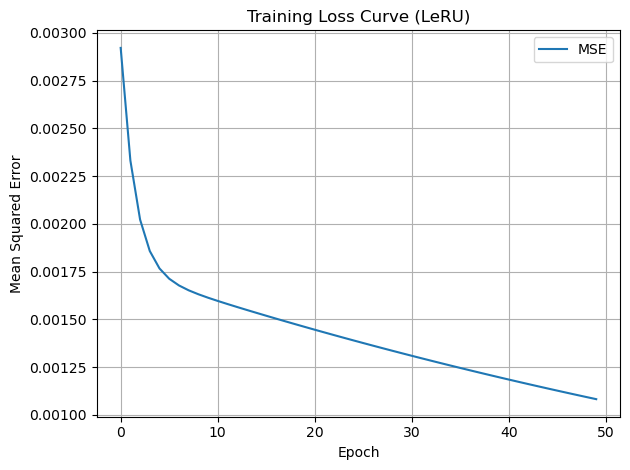

In [30]:
# output
print("\n✅ Training complete.")
print(f"Final weights: a0={a0:.4f}, a1={a1:.4f}, b0={b0:.4f}, b1={b1:.4f}")

# visulize losses
plt.plot(mse_history, label="MSE")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title(f"Training Loss Curve (LeRU)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()